# Exploration du fichier des ventes (tous départements)

In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


## Import des données brutes
> Pour des rainsons de performances, nous n'en importons que 50 %

In [2]:
folder_path = '../data/raw/Sales'
output_file = os.path.join(folder_path, 'merged_sales_data.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, low_memory=False)

# Process chunks
df_sales = pd.concat(chunk for chunk in chunks)

# Reduce dataset size by sampling (e.g., 10% of the data)
df_sales = df_sales.sample(frac=0.5, random_state=42)

df_sales.head()

,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,UU2010,REG,DEP,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
9107484,hektor-328_troispourcent_admin-57646,pr,m,v,0,124,275.0,5,288400,NaN,...,85501,52,85,7.30,4.0,0.038,8.54,50.0,0.044,2325.81
1167462,orpi-1-041082E24VJO,pr,m,v,0,89,300.0,4,292000,NaN,...,30115,76,30,9.89,16.0,0.036,9.89,16.0,0.036,3280.90
6909715,ag440414-421340335,pr,m,v,0,100,2000.0,4,90990,NaN,...,41000,24,41,7.45,5.0,0.098,7.45,5.0,0.098,909.90
9844617,citya-immobilier-501991-TAPP928163,pr,a,v,5,22,NaN,1,76000,NaN,...,9D603,4,974,17.50,17.0,0.061,17.68,950.0,0.061,3454.55
1601589,laforet-immo-facile-21982672,pr,m,v,0,110,820.0,5,529000,NaN,...,34120,76,34,9.17,5.0,0.023,9.17,5.0,0.023,4809.09


### Valeurs manquantes (NAN)

In [3]:
missing_data_percentage_sales = df_sales.isna().sum()*100/len(df_sales)

missing_value_percentage_sales = pd.DataFrame({'column_name': df_sales.columns,
                                         'percent_missing': missing_data_percentage_sales,
                                         'dtypes':df_sales.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_sales.index = range(1, len(missing_value_percentage_sales) + 1)

display(missing_value_percentage_sales)

,column_name,percent_missing,dtypes
1,parking,99.762075,object
2,videophone,99.009029,object
3,prix_terrain,98.683280,float64
4,prix_maison,98.674488,float64
5,surface_balcon,97.651900,float64
6,nb_terraces,80.612440,float64
7,charges_copro,72.706112,float64
8,porte_digicode,72.534446,object
9,nb_logements_copro,72.336869,float64
10,ascenseur,70.965059,object


### Visualisation des NAN

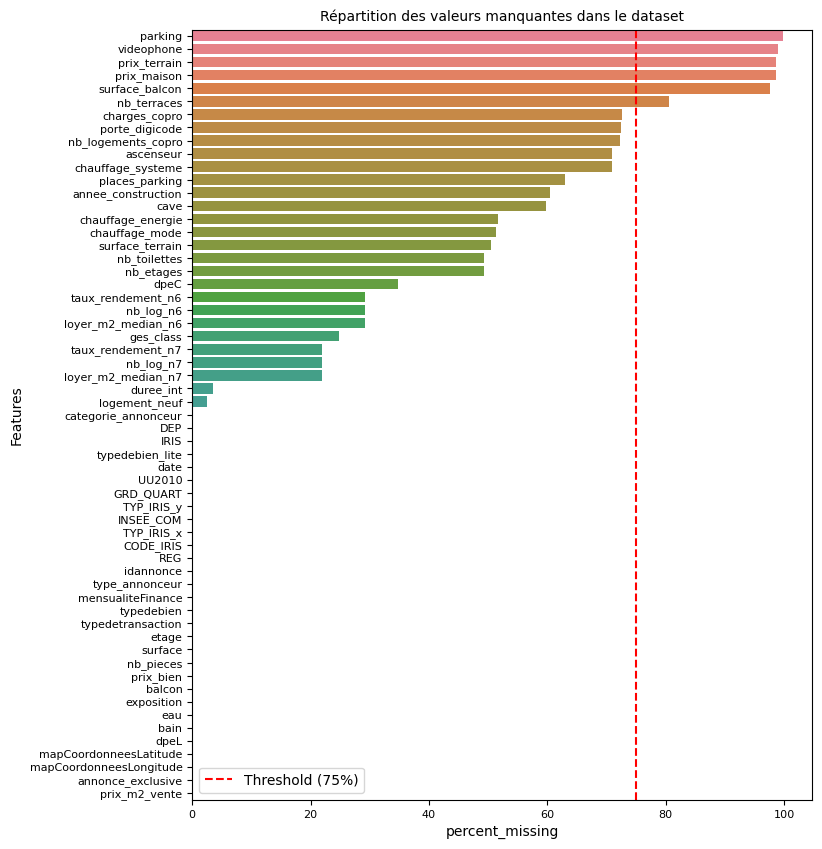

In [4]:
plt.figure(figsize=(8, 10))

sns.barplot(
    y=missing_value_percentage_sales.column_name,
    x=missing_value_percentage_sales.percent_missing,
    hue=missing_value_percentage_sales.column_name,
    order=missing_value_percentage_sales.column_name
)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=75, color='red', linestyle='--', label='Threshold (75%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Features')
plt.legend()

plt.show()



### Seuil des valeurs manquantes supérieur à 75 %

In [5]:
missing_values = df_sales.isnull().mean()

variables_to_keep = missing_values[missing_values <= 0.75].index
print(variables_to_keep)

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'mensualiteFinance', 'balcon', 'eau', 'bain', 'dpeL', 'dpeC',
       'mapCoordonneesLatitude', 'mapCoordonneesLongitude',
       'annonce_exclusive', 'nb_etages', 'places_parking', 'cave',
       'exposition', 'ges_class', 'annee_construction', 'nb_toilettes',
       'porte_digicode', 'ascenseur', 'nb_logements_copro', 'charges_copro',
       'chauffage_energie', 'chauffage_systeme', 'chauffage_mode',
       'categorie_annonceur', 'logement_neuf', 'duree_int', 'typedebien_lite',
       'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y',
       'GRD_QUART', 'UU2010', 'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6',
       'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7',
       'taux_rendement_n7', 'prix_m2_vente'],
      dtype='object')


### Mise à jour du dataset

In [ ]:
df_sales["date"] = pd.to_datetime(df_sales["date"], format='%Y-%m')
df_sales = df_sales[variables_to_keep]

# # Save the cleaned data
# folder_path_clean = '../data/processed/Sales'
# output_file_clean = os.path.join(folder_path_clean, 'merged_sales_data_clean.csv')
# df_sales.to_csv(output_file_clean, index=False)

df_sales.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4924663 entries, 9107484 to 1650836
Data columns (total 53 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   idannonce                4924663 non-null  object        
 1   type_annonceur           4924663 non-null  object        
 2   typedebien               4924663 non-null  object        
 3   typedetransaction        4924663 non-null  object        
 4   etage                    4924663 non-null  int64         
 5   surface                  4924663 non-null  int64         
 6   surface_terrain          2435201 non-null  float64       
 7   nb_pieces                4924663 non-null  int64         
 8   prix_bien                4924663 non-null  int64         
 9   mensualiteFinance        4924663 non-null  int64         
 10  balcon                   4924663 non-null  int64         
 11  eau                      4924663 non-null  int64         
 12 

# Dataviz

### Modalités des variables catégorielles ( moins de 10 modalités )

In [7]:
# Combine object and numerical columns
columns_to_check = df_sales.select_dtypes(include=['object', 'int64', 'float64']).columns

columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) < 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)


Column: type_annonceur
Unique Values: ['pr' 'pa']
--------------------------------------------------
Column: typedebien
Unique Values: ['m' 'a' 'an' 'mn' 'l' 'Maison/Villa neuve' 'h']
--------------------------------------------------
Column: typedetransaction
Unique Values: ['v' 'vp' 'pi']
--------------------------------------------------
Column: annonce_exclusive
Unique Values: ['Non' 'Oui' '0']
--------------------------------------------------
Column: cave
Unique Values: [False True]
--------------------------------------------------
Column: porte_digicode
Unique Values: [False True]
--------------------------------------------------
Column: ascenseur
Unique Values: [True False]
--------------------------------------------------
Column: chauffage_mode
Unique Values: ['Individuel' 'Collectif' 'Collectif, Individuel' 'Individuel, Central'
 'Central' 'Collectif, Central' 'Collectif, Individuel, Central']
--------------------------------------------------
Column: categorie_annonceur
U

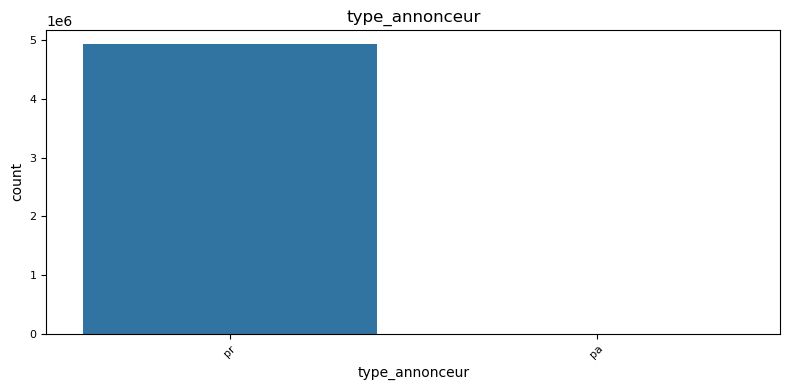

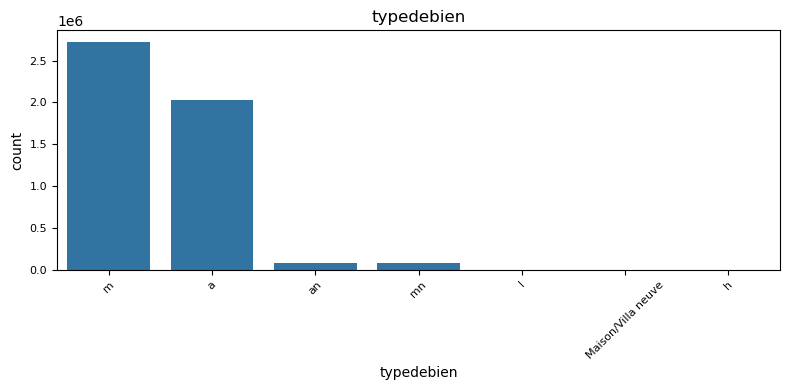

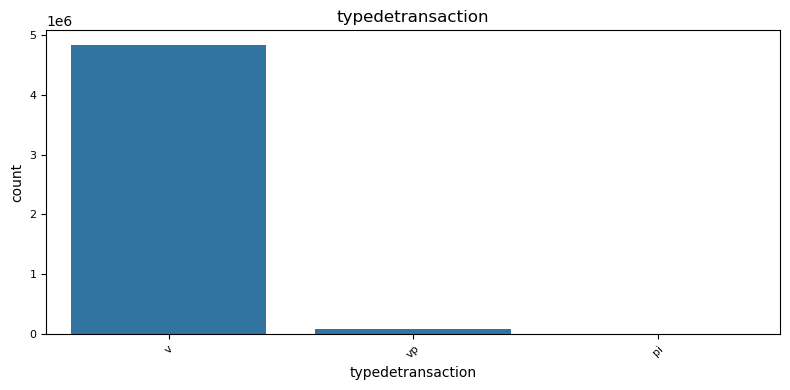

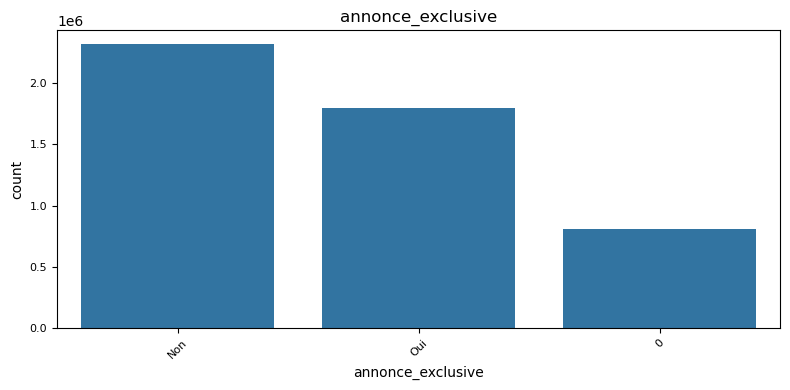

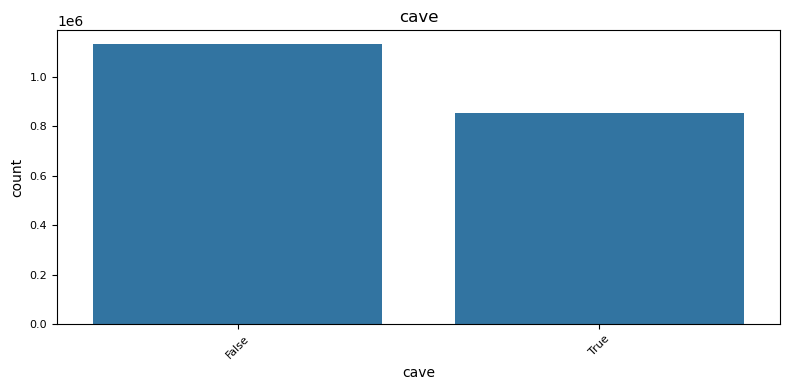

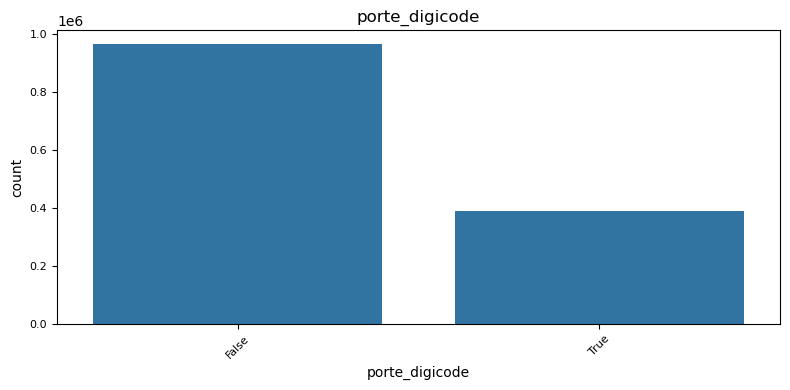

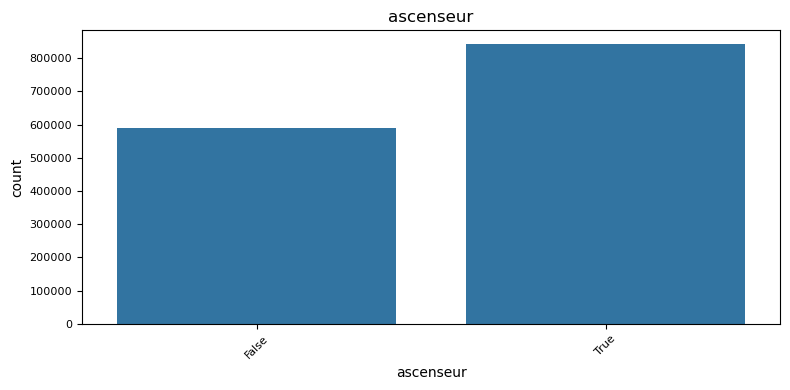

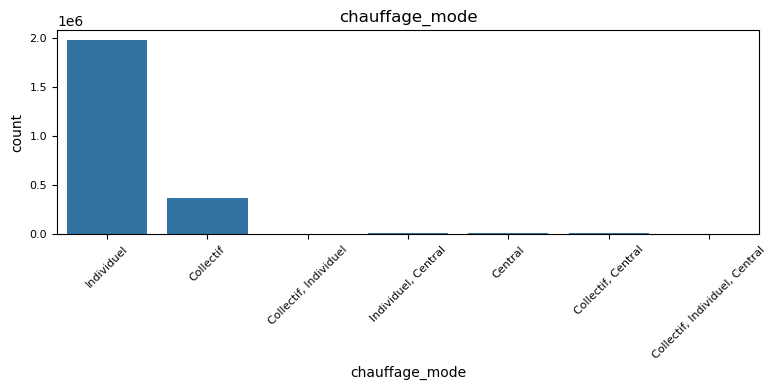

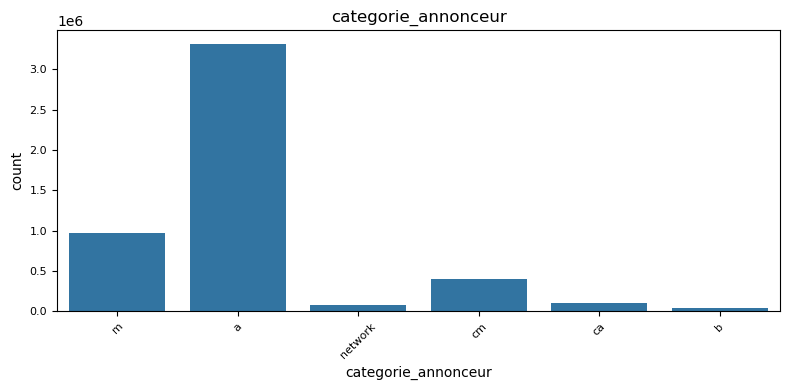

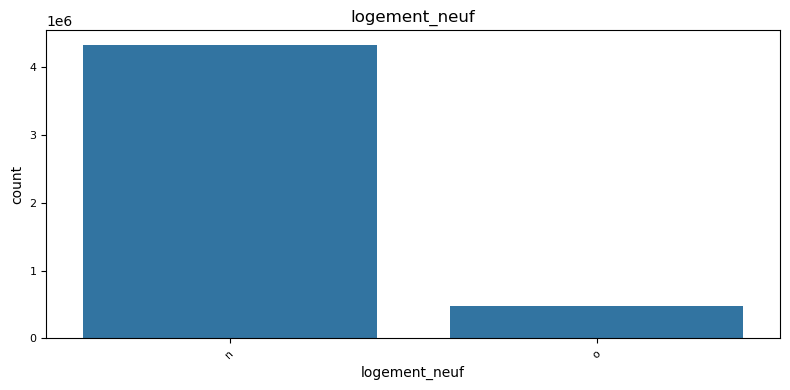

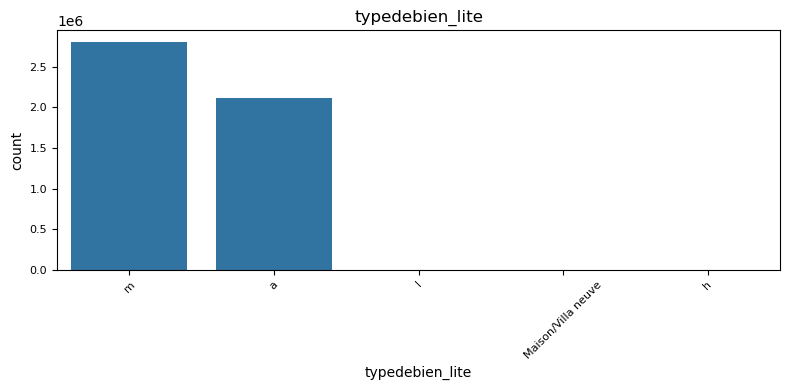

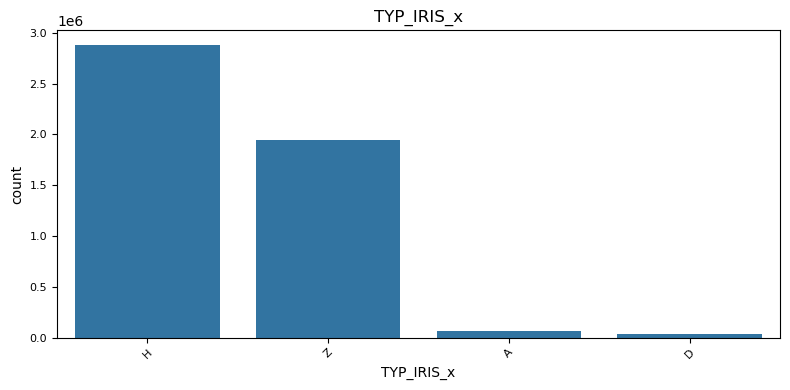

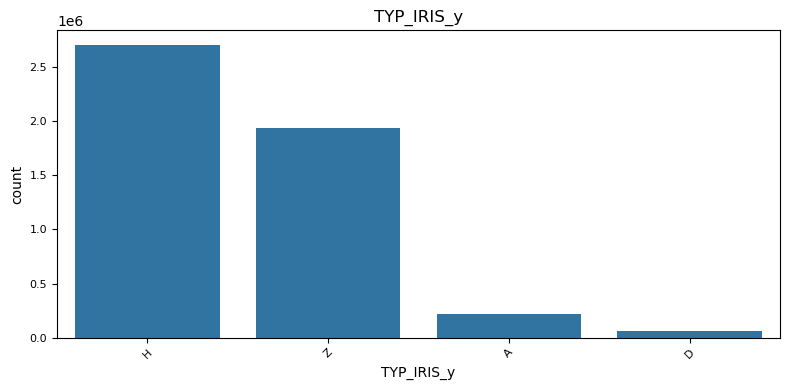

In [8]:
for var_to_viz in columns_checked:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_sales, x=var_to_viz)
    plt.title(f'{var_to_viz}')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

### Modalités des autres variables ( plus de 10 modalités )

In [9]:
columns_investigated = columns_checked
df_sales_remaining = df_sales.drop(columns_investigated,axis=1)

columns_to_check = df_sales_remaining.select_dtypes(include=['object']).columns
columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_remaining[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) > 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

Column: idannonce
Unique Values: ['hektor-328_troispourcent_admin-57646' 'orpi-1-041082E24VJO'
 'ag440414-421340335' ... 'iad-france-857557' 'ag800655-352595179'
 'square-habitat-immo-facile-42339997']
--------------------------------------------------
Column: dpeL
Unique Values: ['D' '0' 'NS' 'C' 'E' 'F' 'B' 'VI' 'G' 'A' 'Blank' 'D kWh/m².year'
 'B kWh/m².year' 'F kWh/m².year' 'E kWh/m².year' 'D-218 kWh/m².year'
 'A kWh/m².year' '856' "'" 'C kWh/m².year' 'Classe indeterminee'
 '0 kWh/m².year' 'D - 231 kWh/m².year']
--------------------------------------------------
Column: exposition
Unique Values: ['0' 'Sud-Ouest' 'Est' 'Sud-Est' 'Sud' 'Est-Ouest' 'sud-ouest' 'Ouest'
 'Nord-Ouest' 'sud-est' 'Nord' 'Nord-Sud' 'Traversant-Est-Ouest'
 'traversant' 'Nord-Est' 'Nord-ouest' 'Nord-est' 'nord-est / sud-ouest'
 'Sud-Est-Ouest' 'Est Sud Ouest' 'nord-ouest / sud-est'
 'Nord Sud Est Ouest' 'Nord Sud Est' 'traversant nord-sud' 'SUD' 'SO'
 'SUD EST' 'sud et ouest' 'sud,est' 'sud,ouest' 'Nord Sud O

### Distribution des variables quantitatives

In [10]:
df_sales_remaining = df_sales_remaining.drop(columns_checked,axis=1)
df_sales_remaining.describe()

,etage,surface,surface_terrain,nb_pieces,prix_bien,mensualiteFinance,balcon,eau,bain,dpeC,...,date,IRIS,REG,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
count,4.924663e+06,4.924663e+06,2.435201e+06,4.924663e+06,4.924663e+06,4.924663e+06,4.924663e+06,4.924663e+06,4.924663e+06,3.215402e+06,...,4924663,4.924663e+06,4.924663e+06,3.483842e+06,3.483842e+06,3.483842e+06,3.842747e+06,3.842747e+06,3.842747e+06,4924663.00
mean,2.675599e+00,1.045663e+02,1.032161e+05,4.320967e+00,3.422266e+05,3.814091e+01,1.419705e-01,4.502121e-01,5.541667e-01,2.126584e+02,...,2022-09-10 16:22:08.481401088,3.793577e+02,5.380642e+01,1.433417e+01,2.950233e+01,6.203552e-02,1.410320e+01,7.743527e+02,6.106579e-02,inf
min,-2.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.000000e+00,-4.000000e+00,0.000000e+00,-2.480000e+02,...,2019-02-01 00:00:00,0.000000e+00,1.000000e+00,1.100000e-01,1.000000e+00,0.000000e+00,1.100000e-01,1.000000e+00,0.000000e+00,0.01
25%,0.000000e+00,6.300000e+01,3.680000e+02,3.000000e+00,1.700000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.430000e+02,...,2021-06-01 00:00:00,0.000000e+00,2.700000e+01,9.680000e+00,2.000000e+00,3.600000e-02,9.670000e+00,5.000000e+00,3.600000e-02,1987.50
50%,0.000000e+00,9.000000e+01,6.620000e+02,4.000000e+00,2.600000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+02,...,2022-12-01 00:00:00,1.020000e+02,5.300000e+01,1.254000e+01,9.000000e+00,4.500000e-02,1.243000e+01,3.500000e+01,4.500000e-02,2975.24
75%,1.000000e+00,1.280000e+02,1.305000e+03,5.000000e+00,3.970000e+05,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.680000e+02,...,2024-02-01 00:00:00,2.010000e+02,7.600000e+01,1.678000e+01,3.400000e+01,5.700000e-02,1.655000e+01,3.920000e+02,5.700000e-02,4440.48
max,2.017000e+03,2.310140e+05,1.170520e+11,1.700000e+02,7.072000e+08,1.064610e+05,2.004000e+03,2.018000e+03,1.237400e+04,7.157000e+04,...,2025-02-01 00:00:00,9.901000e+03,9.400000e+01,2.656120e+03,1.213000e+03,1.411740e+04,5.381740e+03,2.442000e+04,1.302030e+04,inf
std,4.451007e+01,1.616946e+02,1.061040e+08,2.085003e+00,5.826494e+05,3.393749e+02,1.655921e+00,2.746465e+00,1.041222e+01,1.239792e+02,...,NaN,1.059217e+03,2.959214e+01,1.631267e+01,5.655802e+01,1.088464e+01,1.726431e+01,2.501876e+03,1.050653e+01,NaN


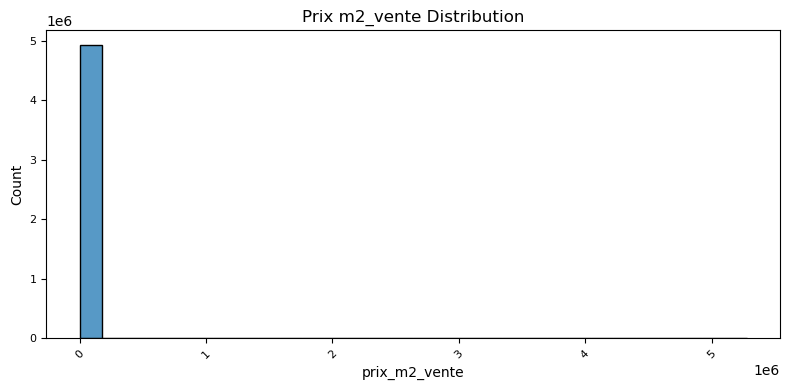

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_remaining, x='prix_m2_vente', bins=30)
plt.title('Prix m2_vente Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [12]:
# Calculate the IQR for 'valeur_fonciere'
Q1 = df_sales_remaining["prix_m2_vente"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_sales_remaining["prix_m2_vente"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_sales_remaining = df_sales_remaining[(df_sales_remaining["prix_m2_vente"] >= lower_bound) & (df_sales_remaining["prix_m2_vente"] <= upper_bound)]


# # Save the cleaned data
# df_sales['prix_m2_vente'] = df_sales_remaining['prix_m2_vente']

# folder_path_clean = '../data/processed/Sales'
# output_file_clean = os.path.join(folder_path_clean, 'merged_sales_data_clean.csv')
# df_sales.to_csv(output_file_clean, index=False)

df_sales.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4924663 entries, 9107484 to 1650836
Data columns (total 53 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   idannonce                4924663 non-null  object        
 1   type_annonceur           4924663 non-null  object        
 2   typedebien               4924663 non-null  object        
 3   typedetransaction        4924663 non-null  object        
 4   etage                    4924663 non-null  int64         
 5   surface                  4924663 non-null  int64         
 6   surface_terrain          2435201 non-null  float64       
 7   nb_pieces                4924663 non-null  int64         
 8   prix_bien                4924663 non-null  int64         
 9   mensualiteFinance        4924663 non-null  int64         
 10  balcon                   4924663 non-null  int64         
 11  eau                      4924663 non-null  int64         
 12 

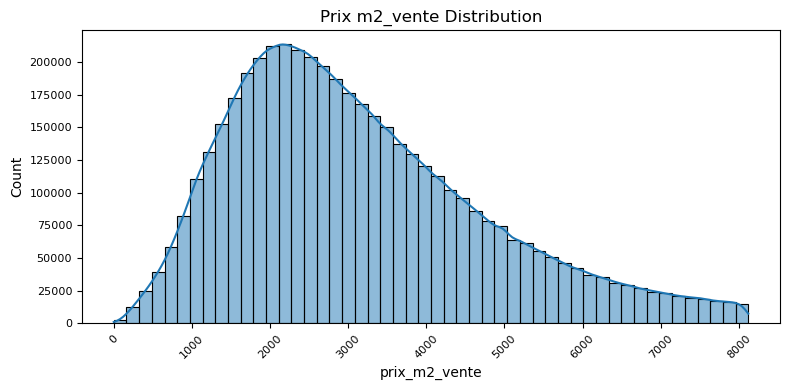

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_remaining, x='prix_m2_vente', bins=50, kde=True)
plt.title('Prix m2_vente Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

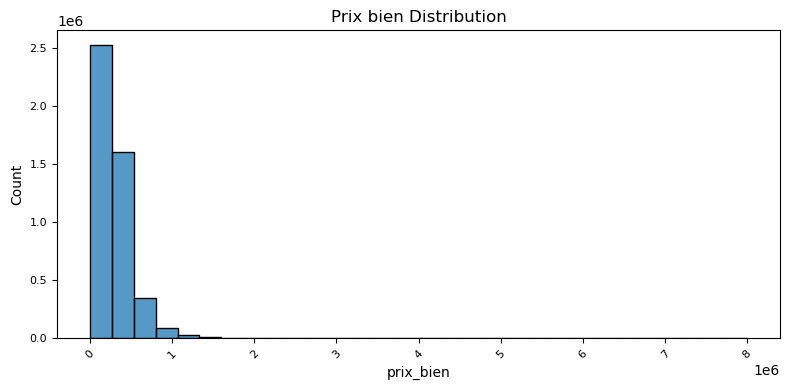

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_remaining, x='prix_bien', bins=30)
plt.title('Prix bien Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [15]:
# Calculate the IQR for 'valeur_fonciere'
Q1 = df_sales_remaining["prix_bien"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_sales_remaining["prix_bien"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_sales_remaining = df_sales_remaining[(df_sales_remaining["prix_bien"] >= lower_bound) & (df_sales_remaining["prix_bien"] <= upper_bound)]

# # Save the cleaned data
# df_sales['prix_bien'] = df_sales_remaining['prix_bien']

# folder_path_clean = '../data/processed/Sales'
# output_file_clean = os.path.join(folder_path_clean, 'merged_sales_data_clean.csv')
# df_sales.to_csv(output_file_clean, index=False)

df_sales.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4924663 entries, 9107484 to 1650836
Data columns (total 53 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   idannonce                4924663 non-null  object        
 1   type_annonceur           4924663 non-null  object        
 2   typedebien               4924663 non-null  object        
 3   typedetransaction        4924663 non-null  object        
 4   etage                    4924663 non-null  int64         
 5   surface                  4924663 non-null  int64         
 6   surface_terrain          2435201 non-null  float64       
 7   nb_pieces                4924663 non-null  int64         
 8   prix_bien                4924663 non-null  int64         
 9   mensualiteFinance        4924663 non-null  int64         
 10  balcon                   4924663 non-null  int64         
 11  eau                      4924663 non-null  int64         
 12 

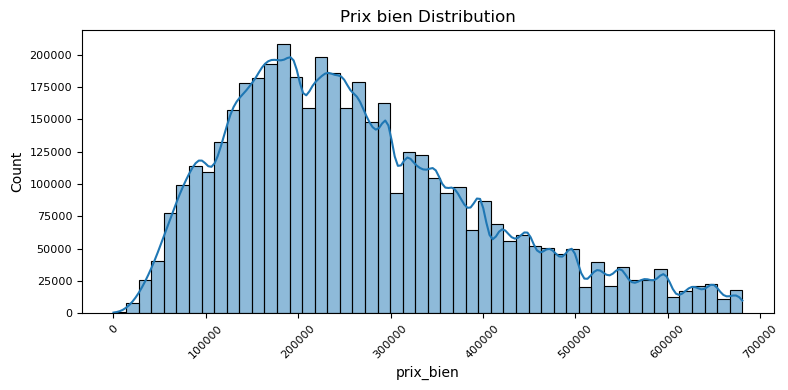

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_remaining, x='prix_bien', bins=50, kde=True)
plt.title('Prix bien Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

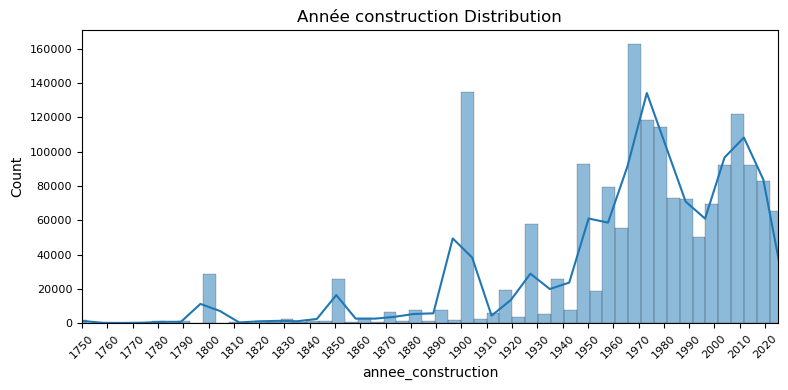

In [17]:
import numpy as np

plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_remaining, x='annee_construction', bins=300, kde=True)
plt.title('Année construction Distribution')
plt.xticks(rotation=45, fontsize=8)

tick_positions = np.arange(1750, 2026, 10)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(1750, 2025)

plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()